In [40]:
#Importing libraries
import pandas as pd

#Load the dataset
file_path = 'loan.csv'
df = pd.read_csv(file_path)




C:\Users\homer\AppData\Local\Temp\ipykernel_13032\3641729182.py:6: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [41]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment_per_month,grade,sub_grade,employment_tenure_of_borrower_years,home_ownership,...,total_pymnt_inv,principal_received_to_date,interest_revieved_to_date,late_fees_received_to_date,recoveries,collection_recovery_fee,last_pymnt_month,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10.0,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,0.5,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10.0,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10.0,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,3000,3000,3000.0,60,12.69%,67.79,B,B5,1.0,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [42]:
import numpy as np

#Handling outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)

IQR=Q3-Q1

#Remove rows where any column has outlier

df=df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 +1.5*IQR))).any(axis=1)]


In [43]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment_per_month,grade,sub_grade,employment_tenure_of_borrower_years,home_ownership,...,total_pymnt_inv,principal_received_to_date,interest_revieved_to_date,late_fees_received_to_date,recoveries,collection_recovery_fee,last_pymnt_month,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10.0,RENT,...,5833.84,5000.00,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10.0,RENT,...,3005.67,2400.00,605.67,0.0,0.0,0.0,Jun-14,649.91,NaN,May-16
6,7000,7000,7000.0,60,15.96%,170.08,C,C5,8.0,RENT,...,10110.84,6985.61,3125.23,0.0,0.0,0.0,May-16,1313.76,NaN,May-16
7,3000,3000,3000.0,36,18.64%,109.43,E,E1,9.0,RENT,...,3939.14,3000.00,939.14,0.0,0.0,0.0,Jan-15,111.34,NaN,Dec-14
10,6500,6500,6500.0,60,14.65%,153.45,C,C3,5.0,OWN,...,7678.02,6500.00,1178.02,0.0,0.0,0.0,Jun-13,1655.54,NaN,Dec-15


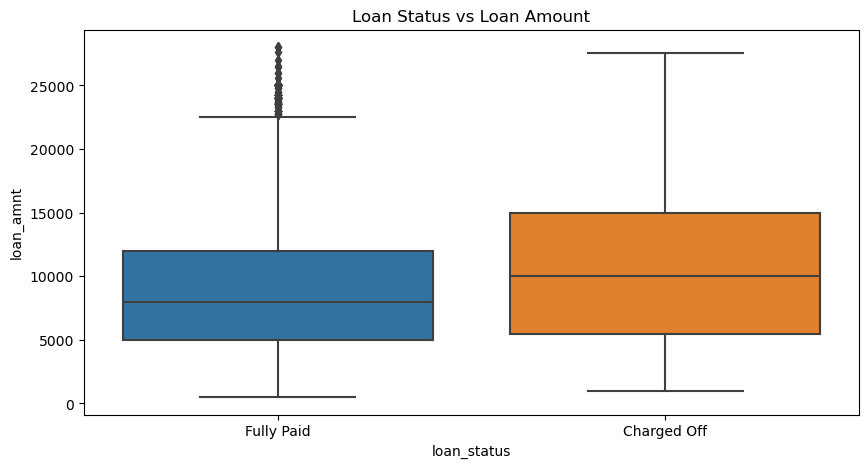

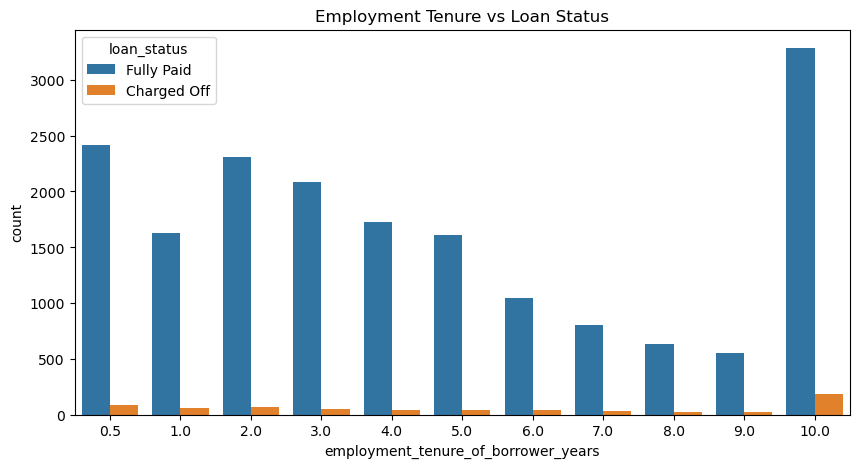

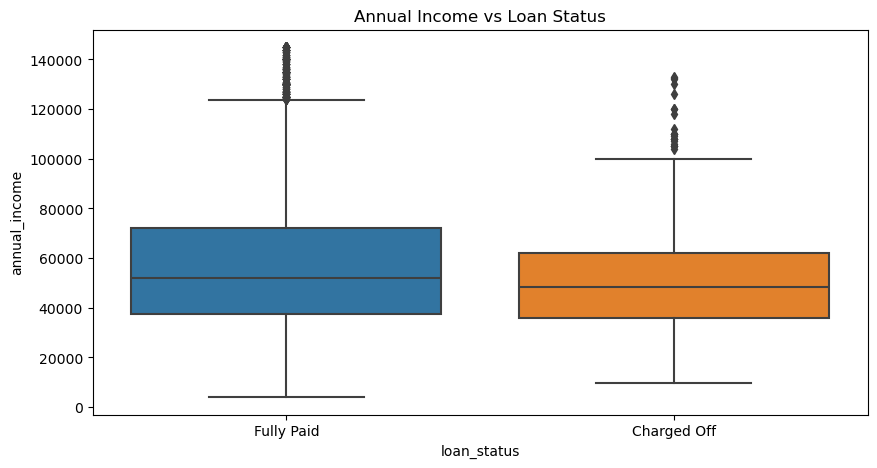

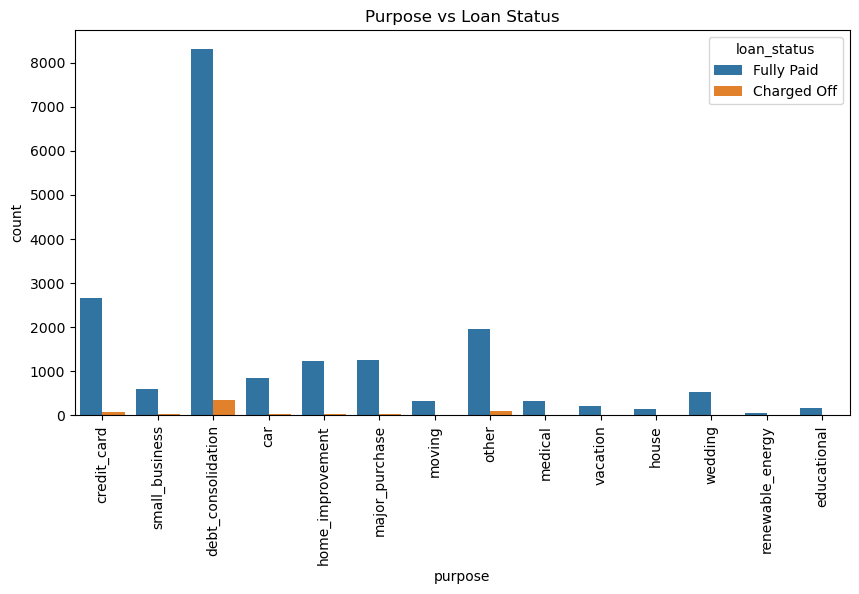

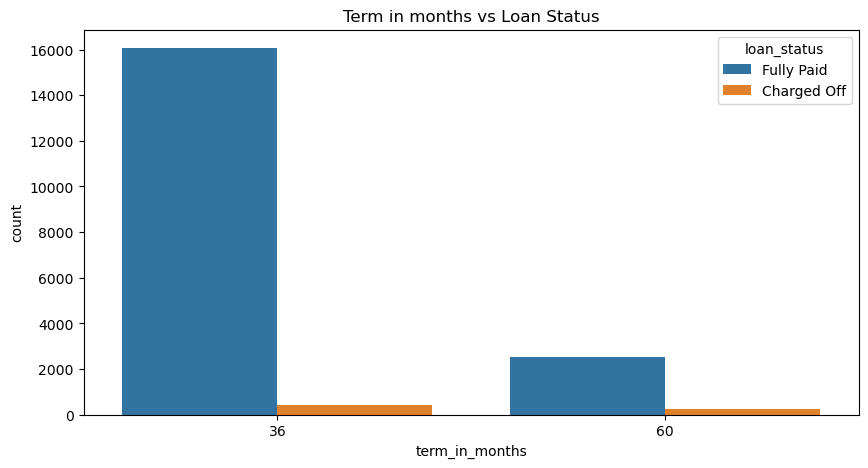

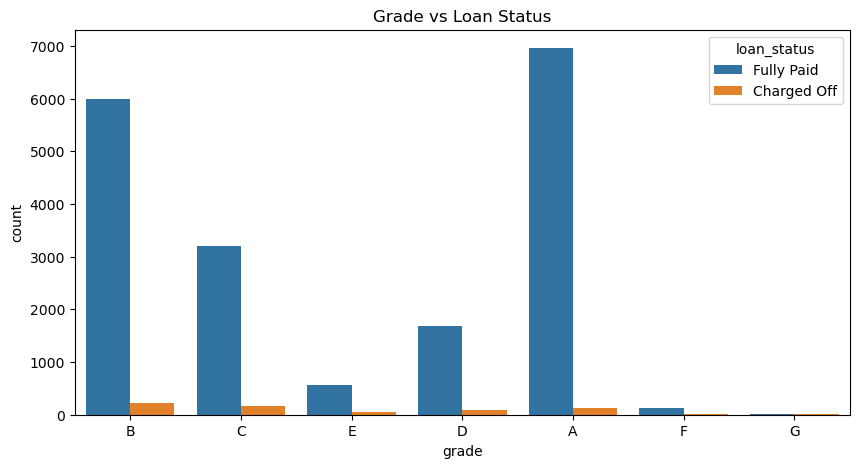

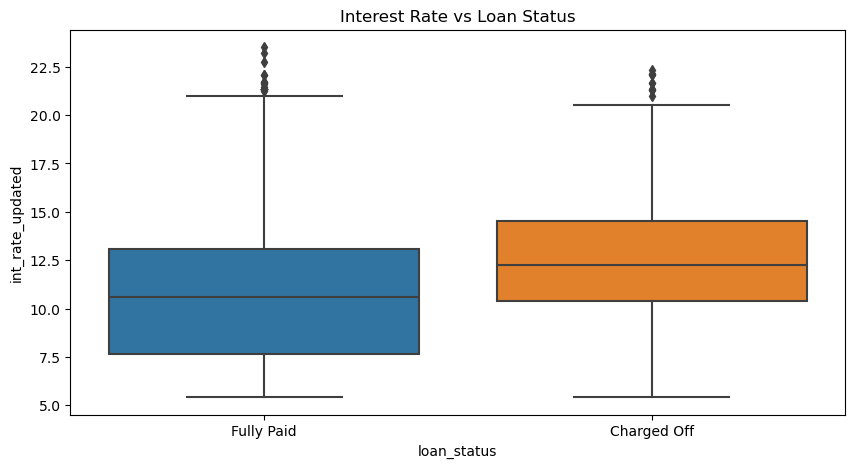

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot graph for Loan status vs Loan Amount

plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.title('Loan Status vs Loan Amount')
plt.show()

#employment Tensure vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='employment_tenure_of_borrower_years',hue='loan_status',data=df)
plt.title('Employment Tenure vs Loan Status')
plt.show()

#Home Ownership vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='annual_income',data=df)
plt.title('Annual Income vs Loan Status')
plt.show()

#Purpose vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='loan_status',data=df)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()

#Terms in months vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='term_in_months',hue='loan_status',data=df)
plt.title('Term in months vs Loan Status')
plt.show()

#Grade vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='grade',hue='loan_status',data=df)
plt.title('Grade vs Loan Status')
plt.show()


# convert int_rate to numeric
df['int_rate_updated']=df['int_rate'].str.rstrip('%').astype('float')

#Interst Rate vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='int_rate_updated',data=df)
plt.title('Interest Rate vs Loan Status')
plt.show()






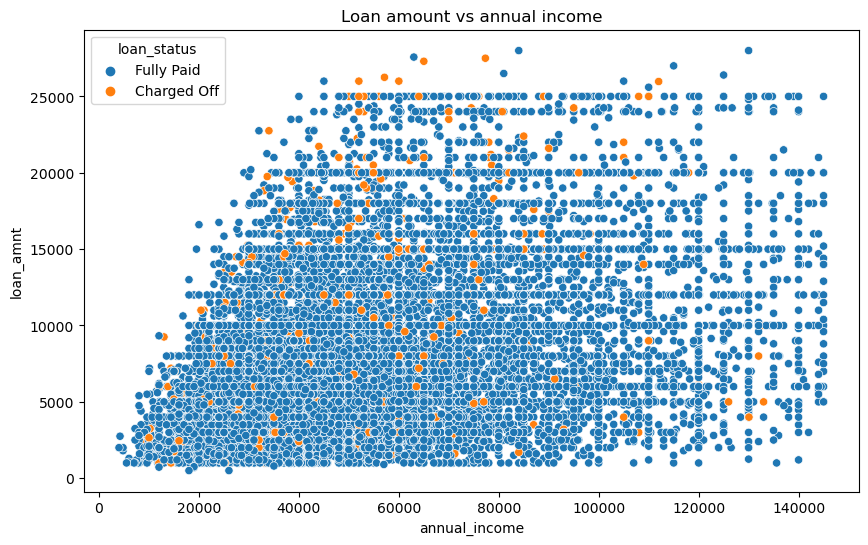

In [46]:
# Loan amount vs Annual income , color coded by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income',y='loan_amnt',hue='loan_status',data=df)
plt.title('Loan amount vs annual income')
plt.show()

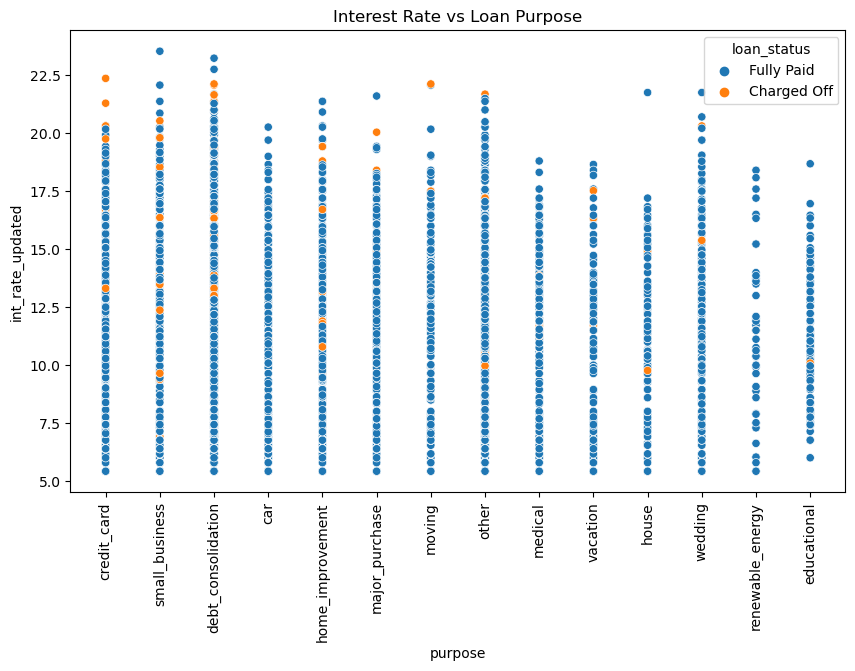

In [48]:
# Interest Rate vs Loan Purpose , grouped by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='purpose',y='int_rate_updated',hue='loan_status',data=df)
plt.title('Interest Rate vs Loan Purpose')
plt.xticks(rotation=90)
plt.show()